# Problem statement 

* Natural Language Processing (NLP) strategies will be used to analuse Yelp reviews data
* Number of stars to indicate the rating
* 'Cool', 'useful' and 'funny' categories of reviews too


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
yelp_df = pd.read_csv('data/yelp.csv')

In [6]:
yelp_df['text'][4]

'General Manager Scott Petello is a good egg!!! Not to go into detail, but let me assure you if you have any issues (albeit rare) speak with Scott and treat the guy with some respect as you state your case and I\'d be surprised if you don\'t walk out totally satisfied as I just did. Like I always say..... "Mistakes are inevitable, it\'s how we recover from them that is important"!!!\n\nThanks to Scott and his awesome staff. You\'ve got a customer for life!! .......... :^)'

## Visualise data

In [7]:
yelp_df['length'] = yelp_df['text'].apply(len)

<Axes: ylabel='Frequency'>

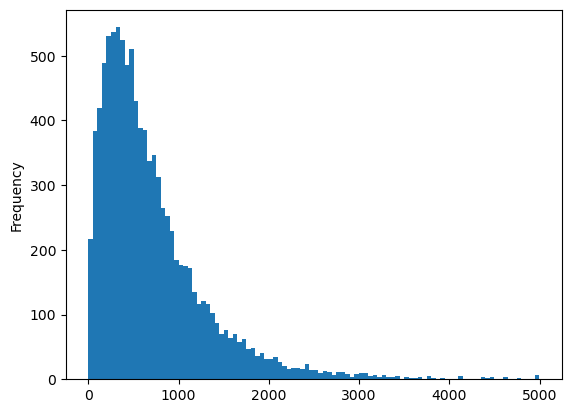

In [9]:
yelp_df['length'].plot(bins = 100, kind = 'hist')

In [10]:
yelp_df.length.describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

In [15]:
yelp_df[yelp_df['length'] == 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

<Axes: xlabel='count', ylabel='stars'>

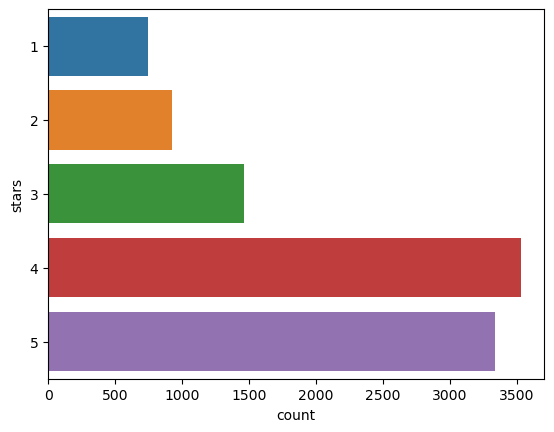

In [17]:
sns.countplot(y='stars', data = yelp_df)

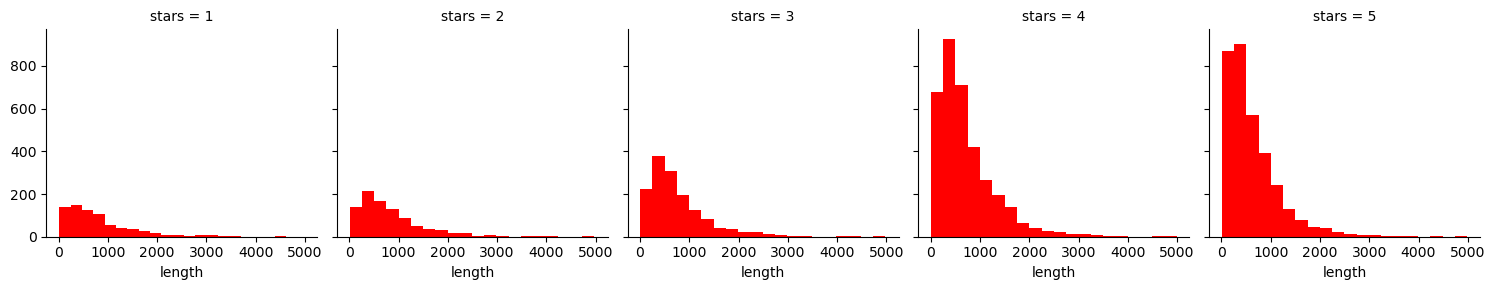

In [21]:
g = sns.FacetGrid(data=yelp_df, col='stars', col_wrap=5)
g.map(plt.hist, 'length', bins=20, color='r')

In [65]:
yelp_df_1 = yelp_df[yelp_df['stars']==1]
yelp_df_5 = yelp_df[yelp_df['stars']==5]

In [66]:
yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5])

## Look at balance of dataset

In [26]:
# 18% so quite an unbalanced dataset
(len(yelp_df_1)/len(yelp_df_1_5)) * 100

18.330885952031327

## Clean data and text

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/annabelwestermann/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
test_word = 'Hello My. Future I am so happy to be learning AI now!'

test_word_no_punc = [char for char in test_word if char not in string.punctuation]
test_word_no_space = ''.join(test_word_no_punc)
test_punc_clean = [word for word in test_word_no_space.split() if word.lower() not in stopwords.words('english')]

In [42]:
test_punc_clean

['Hello', 'Future', 'happy', 'learning', 'AI']

In [43]:
# vectorizer

from sklearn.feature_extraction.text import CountVectorizer
mini_challenge = ['Hello World','Hello Hello World','Hello World world world']

vectorizer_challenge = CountVectorizer()
X_challenge = vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


## NLP for Yelp Review

In [46]:
def message_cleaning(message):
    test_punc_removed = [char for char in message if char not in string.punctuation]
    test_punc_join = ''.join(test_punc_removed)
    test_punc_clean = [word for word in test_punc_join.split() if word.lower() not in stopwords.words('english')]
    return test_punc_clean

In [47]:
yelp_df_clean = yelp_df_1_5['text'].apply(message_cleaning)

In [48]:
print(yelp_df_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [50]:
#vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning)
yelp_countvectorizer = vectorizer.fit_transform(yelp_df_1_5['text'])

In [58]:
print(yelp_countvectorizer.get_feature_names_out())

AttributeError: get_feature_names_out not found

In [55]:
print(yelp_countvectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Train model with all data

In [69]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
label = yelp_df_1_5['stars'].values

In [70]:
NB_classifier.fit(yelp_countvectorizer, label)

MultinomialNB()

In [72]:
test1 = ['amazing food! highly recommended!']
test2 = ['shit food, made me sick']

test_sample_countvectorizer = vectorizer.transform(test2)
test_predict = NB_classifier.predict(test_sample_countvectorizer)

test_predict 

array([1])

## Train and test dataset

In [74]:
from sklearn.model_selection import train_test_split

X = yelp_countvectorizer
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [75]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# Evaluate model

In [76]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([5, 5, 5, ..., 5, 1, 5])

<Axes: >

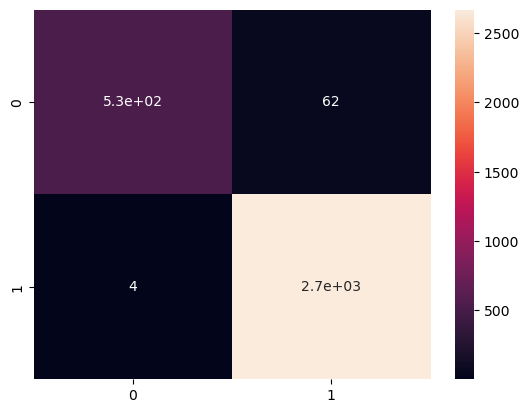

In [77]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

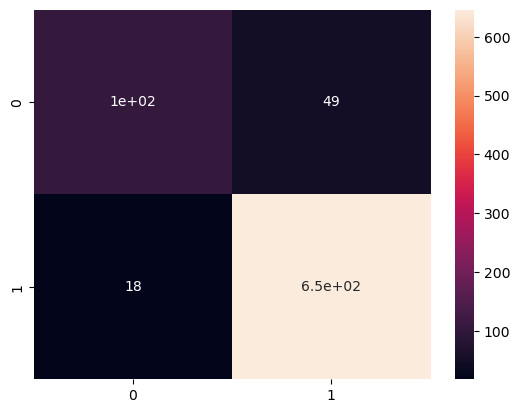

In [78]:
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [79]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.85      0.68      0.76       154
           5       0.93      0.97      0.95       664

    accuracy                           0.92       818
   macro avg       0.89      0.83      0.85       818
weighted avg       0.92      0.92      0.91       818



In [82]:
from sklearn.feature_extraction.text import TfidfTransformer

yelp_tfidf = TfidfTransformer().fit_transform(yelp_countvectorizer)
print(yelp_tfidf.shape)

(4086, 26435)


<Axes: >

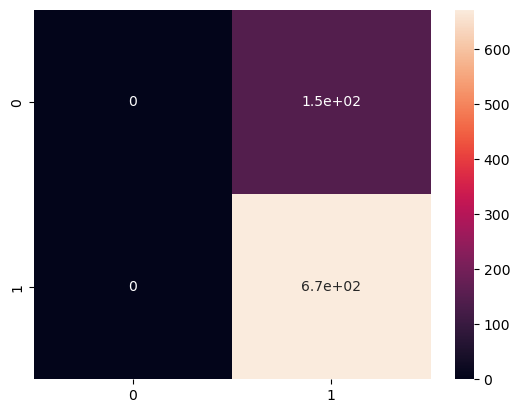

In [83]:
from sklearn.model_selection import train_test_split

X = yelp_tfidf
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)